What is  Perceptron:
    it is an algorthims and it use in supervised machine learning
    because its design it became the building block of the DL

    The perceptron is the simplest form of a neural network used for binary classification tasks

    
 - design of perceptron :we call it function or mathematical model
    
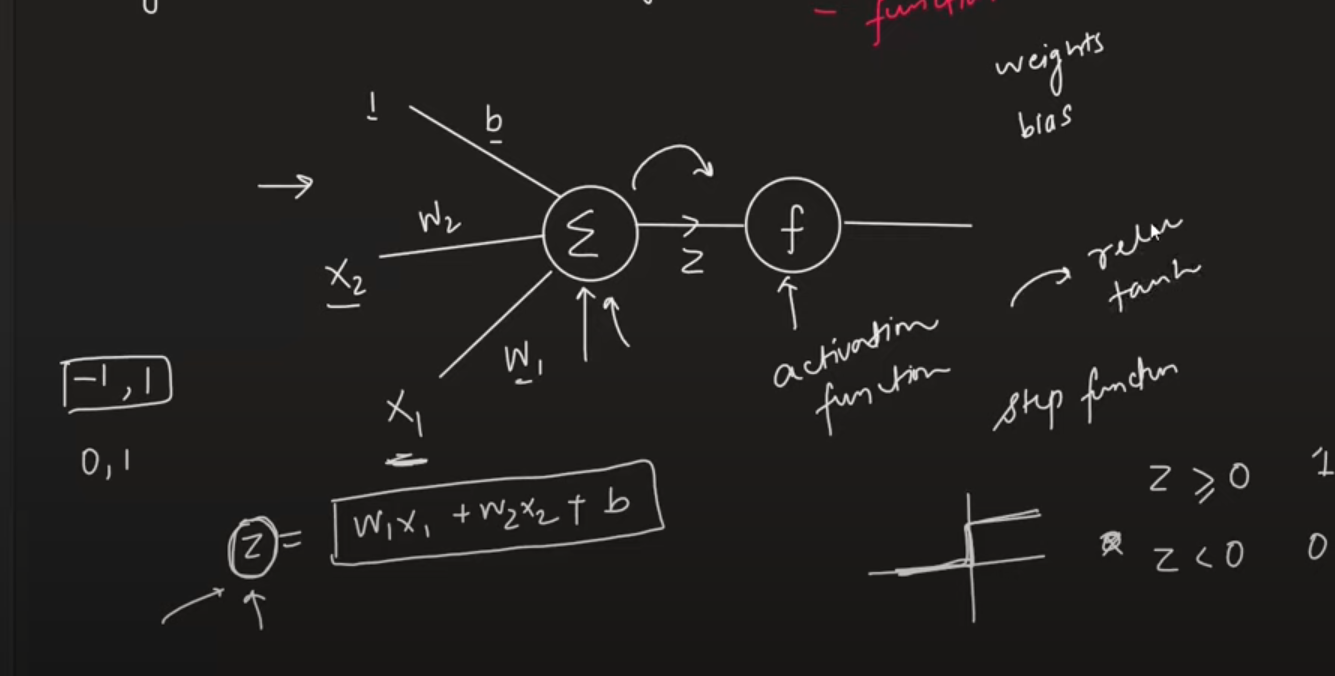

In [ ]:
x1 and x2 : input
b-biases
w1,w2 : weights 
summation 
f : activation 
    - perpose of activation is to bring the ouput in perticular range


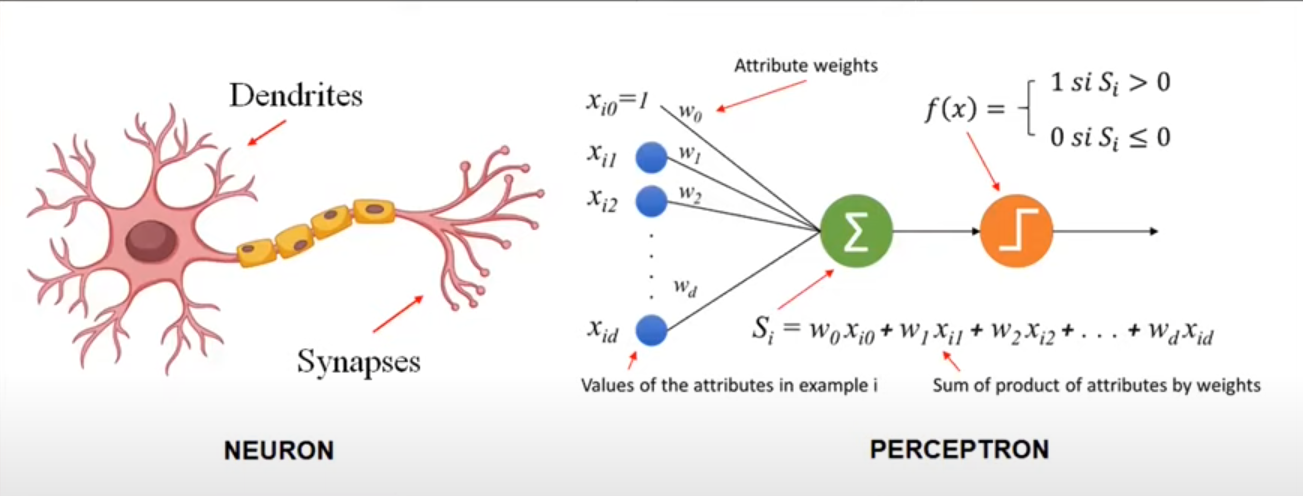

In [2]:
Perceptron is inspired by biological neurons

SyntaxError: invalid syntax (1954088960.py, line 1)

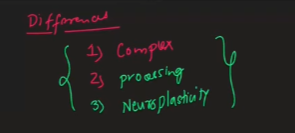

In [ ]:
Interpretation of Peceptron:
   weight : it gives the features importance  

Geometric Intuition:
    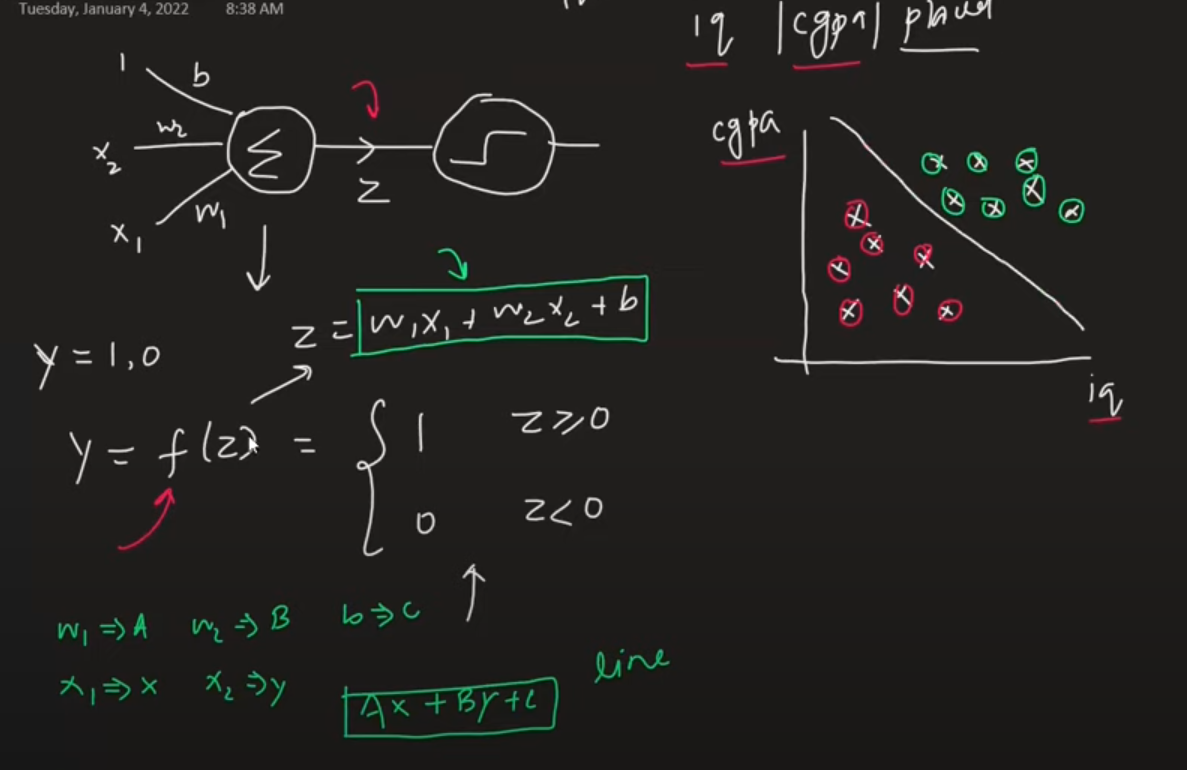
    

In [ ]:
perceptron in nothing but line
perceptron is binary classifier
perceptron has the limitation :its only classifiy the sort of linear data only
    on non_linear perceptron will fail

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('placement.csv')

In [12]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

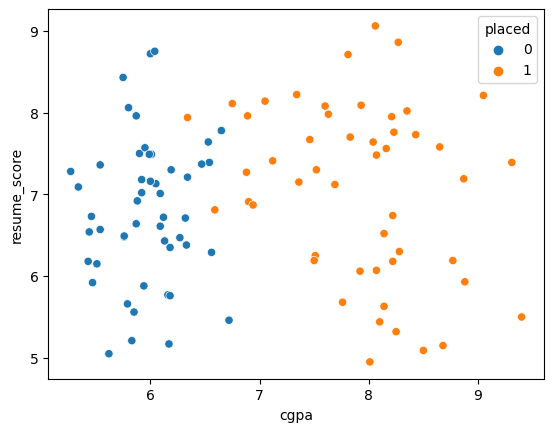

In [13]:
sns.scatterplot(data=df,x='cgpa',y='resume_score',hue='placed')

In [14]:
x=df.iloc[:,:2]

In [17]:
y =df.iloc[:,-1]

In [20]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(x,y)

Perceptron()

In [21]:
p.coef_

array([[ 40.26, -36.  ]])

In [22]:
p.intercept_

array([-25.])

In [23]:
from mlxtend.plotting import plot_decision_regions

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

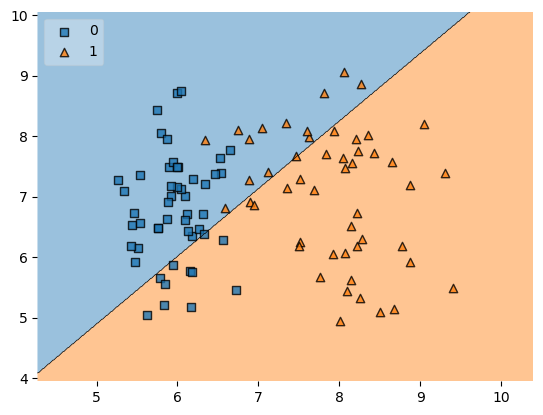

In [25]:
plot_decision_regions(x.values,y.values,clf=p,legend=2)

# Perceptron trick

here we apply the loop and we check each point is perfectly classified or not if not then we adjust weight to get perfectly classified

- What is the objective of perceptron learning?
- Explanation: The objective of perceptron learning is to adjust weight along with class identification.

What is the main difference between perceptron and logistic regression?
Logistic regression and the perceptron algorithm are very similar to each other. It's common to think of logistic regression as a kind of perceptron algorithm on steroids, in that a logistic model can predict probabilities while a perceptron can only predict yes or no.


in pereceprton if output of 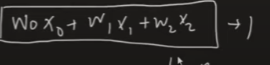


output of above equation is positive then it predict 1 if negative the ouput is 0

how to know that in which region your lable are lies
>> Ax1+By1+c>0  >positive 
>> Ax1+By1+c<0  >negative region
>> Ax1+By1+c=0 > point lies on line

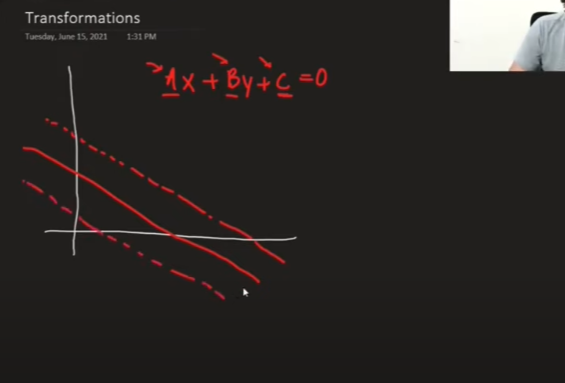

To make the Transformation or to get perfect classification >> we neeed adjust value of a,b,c
Ax1+By1+c=0

- if we make changes in c >> the line will shift in parallel of your origin line
- if we make A then we make rotation around Y-axis
- if we make B then we make rotation around X-axis


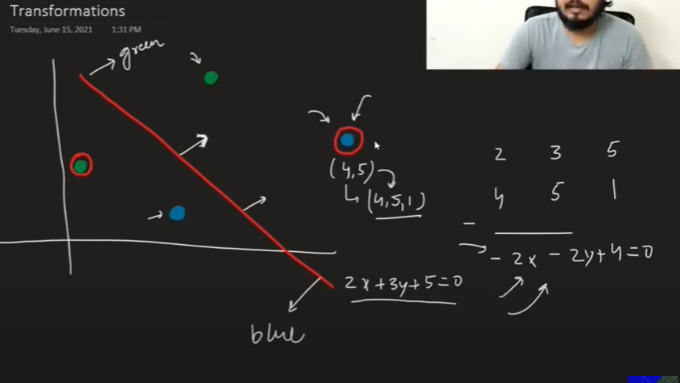

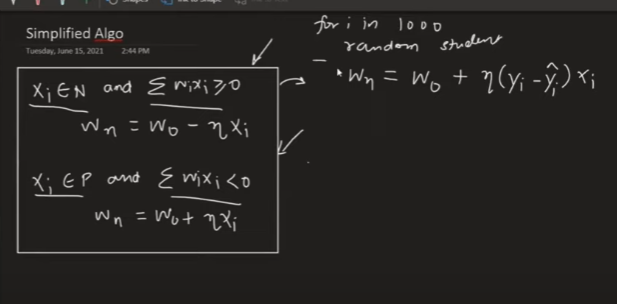

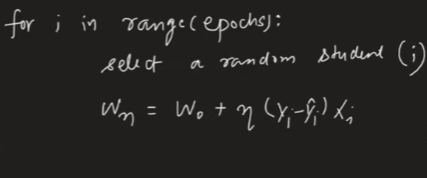

# USE OF STEP FUNCTION IN PYTHON
step(0.234)

In [4]:
step(-.23)

NameError: name 'step' is not defined

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=True)

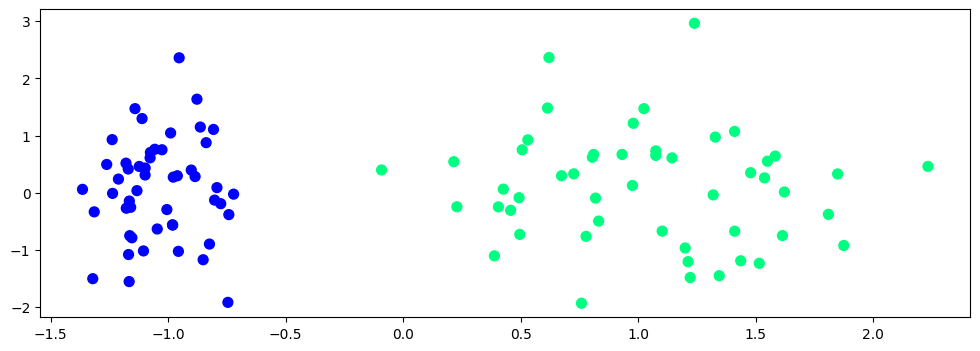

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=50)

In [3]:
def get_step(z):
    return 1 if z>0 else 0

In [4]:
# Create Algorithms of Perceptron 

def get_perceptron(X,y,epoch):
    X = np.insert(X,0,1,axis=1) # insert the one as new features
    weights   =  np.ones(X.shape[1])
    lr = 0.1
    for i in range(epoch):
        j = np.random.randint(0,X.shape[0])
        y_hat = get_step(np.dot(X[j],weights)) 
        
        weights = weights + lr *(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]



In [5]:
intercept_,coef_ = get_perceptron(X,y,1000)
print(intercept_)
print(coef_)



m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])


x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

0.5000000000000001
[1.47254501 0.18834033]


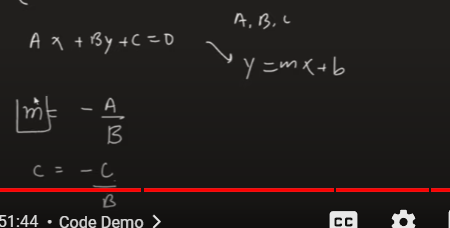

(-3.0, 2.0)

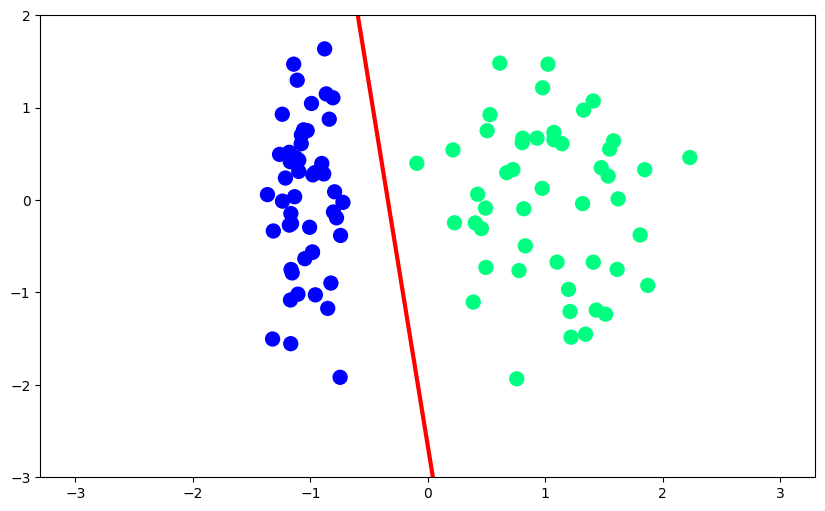

In [6]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [7]:
# create Animation to see the conversion
def get_perceptron_(X,y,epoch):
    m = []
    b = []

    X = np.insert(X,0,1,axis=1) # insert the one as new features
    weights   =  np.ones(X.shape[1])
    lr = 0.1
    for i in range(epoch):
        j = np.random.randint(0,X.shape[0])
        y_hat = get_step(np.dot(X[j],weights)) 
        
        weights = weights + lr *(y[j]-y_hat)*X[j]
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
    return m,b

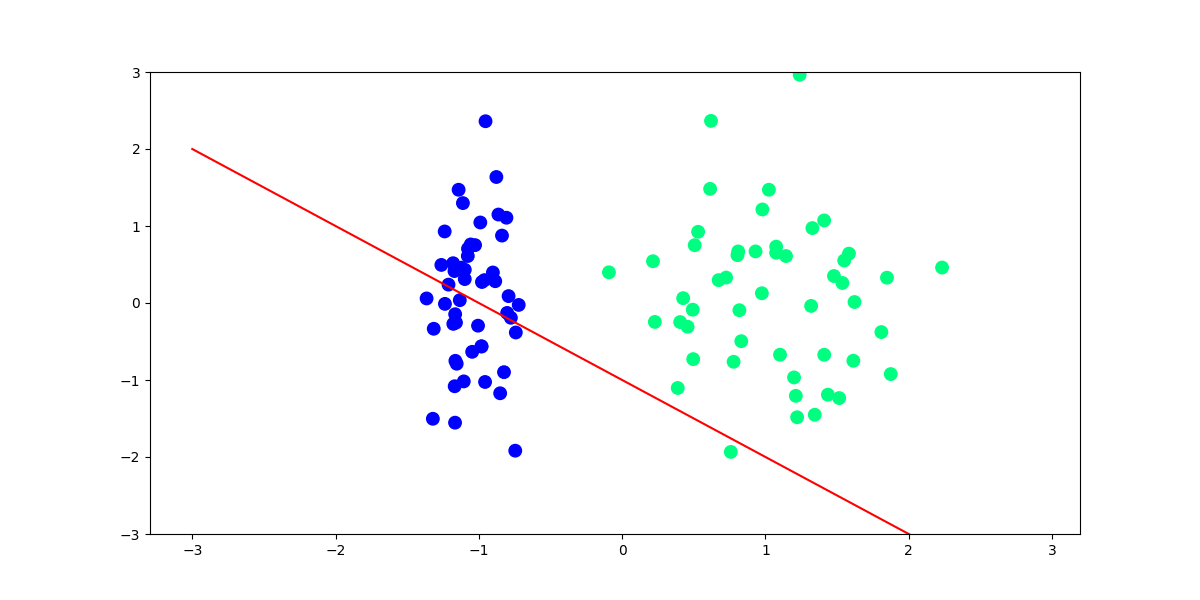

In [9]:
# %matplotlib notebook
# !pip install ipympl
%matplotlib widget
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig,ax  = plt.subplots(figsize=(12,6))



m,b = get_perceptron_(X,y,1000)
# print(m)
# print(b)
x_i  =np.arange(-3,3,0.1)
y_i  = x_i*m[0]+b[0]

ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=80)
line,=ax.plot(x_i,y_i,'r')
plt.ylim(-3,3)

def update(i):
    label  ='epoch {0}'.format(i+1)
    line.set_ydata(x_i*m[i]+b[i])
    ax.set_xlabel(label)

anim = FuncAnimation(fig,update,repeat=False,frames=200,interval=100)

C:\Users\BW_ML_1\AppData\Local\Temp\ipykernel_9060\3863804890.py:18: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update_plot, interval=1000)


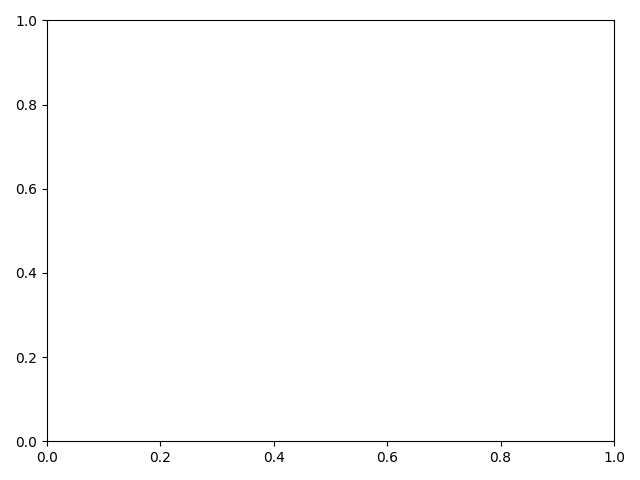

In [9]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np

C3 = np.linspace(0.5, 10, 100)
t = np.linspace(0.5, 10, 100)

data_skip = 2

fig, ax = plt.subplots()


def update_plot(i):
    ax.plot(C3[i:i+data_skip], t[i:i+data_skip])
    ax.scatter(C3[i], t[i], marker='o', color='r')


ani = FuncAnimation(fig, update_plot, interval=1000)

plt.tight_layout()
plt.show()